Author: Pınar Süngü

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Read Data

train_data = pd.read_excel('Problem3Train.xlsx')

In [3]:
print("The number of rows:",train_data.shape[0])
print("The number of columns:",train_data.shape[1])

The number of rows: 441
The number of columns: 8


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   userID          441 non-null    int64         
 1   bookerCC        441 non-null    object        
 2   international   441 non-null    int64         
 3   length_of_stay  441 non-null    int64         
 4   channel         441 non-null    object        
 5   bookDate        441 non-null    datetime64[ns]
 6   commission      441 non-null    float64       
 7   ltv             441 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 27.7+ KB


# Numerical Variables

In [5]:
numerical_cols = train_data.select_dtypes(include=["int64","float64"])

In [6]:
numerical_cols.drop("userID",axis=1,inplace=True)

C:\Users\pinarsungu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Summary Statistics of Numerical features

In [7]:
numerical_cols.describe()

,international,length_of_stay,commission,ltv
count,441.000000,441.00000,441.000000,441.000000
mean,0.494331,2.62585,99.392517,117.957710
std,0.500536,1.96750,76.403524,98.801338
min,0.000000,1.00000,20.000000,20.370000
25%,0.000000,1.00000,47.300000,51.350000
50%,0.000000,2.00000,84.000000,94.590000
75%,1.000000,3.00000,126.000000,150.710000
max,1.000000,10.00000,546.000000,756.640000


# EDA
Numerical Features
LTV - Target variable analysis

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


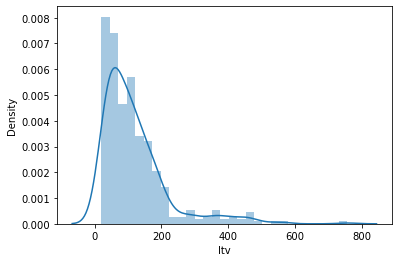

In [8]:
sns.distplot(train_data["ltv"])
plt.show()

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


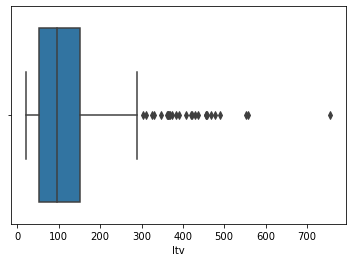

In [9]:
sns.boxplot(train_data["ltv"])
plt.show()

In [10]:
train_data["ltv"].skew()

2.3373869554411875

From the distribution and box plot we can infer that LTV is right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.

# length_of_stay

Univariate Analysis

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


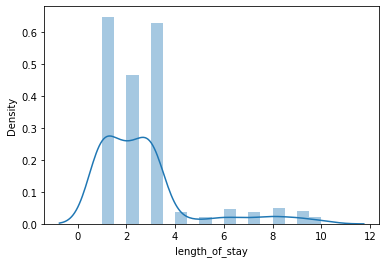

In [11]:
sns.distplot(train_data["length_of_stay"])
plt.show()

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


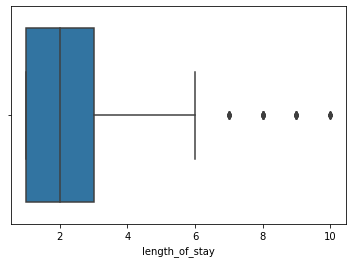

In [12]:
sns.boxplot(train_data["length_of_stay"])
plt.show()

Bivariate Analysis

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


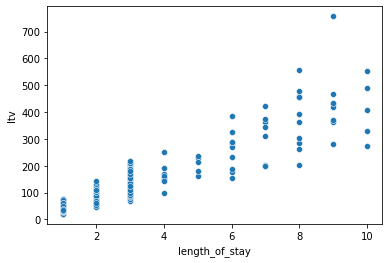

In [13]:
sns.scatterplot(train_data["length_of_stay"],train_data["ltv"])
plt.show()

There is linear relationship between length_of_stay and LTV

# commission

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


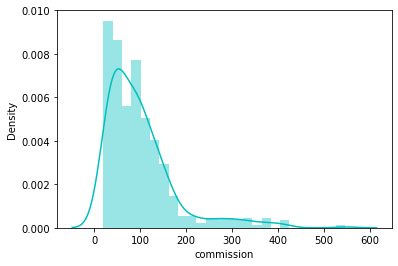

In [14]:
sns.distplot(train_data["commission"],color='c')
plt.show()

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


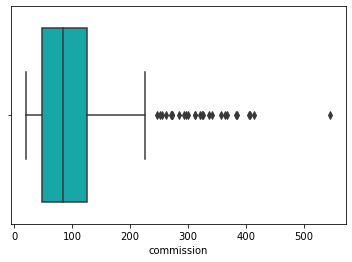

In [15]:
sns.boxplot(train_data["commission"],color='c')
plt.show()

Commission behaves like LTV

Bivariate Analysis

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


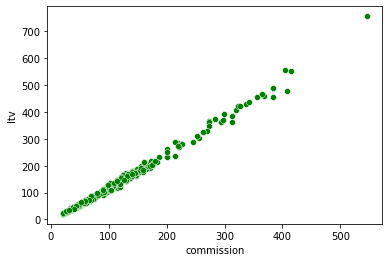

In [16]:
sns.scatterplot(train_data["commission"],train_data["ltv"],color='g')
plt.show()

There is linear relationship between commission and LTV

# Categorical variables

In [17]:
cat_cols = train_data.select_dtypes(include="object")

In [18]:
no_col = train_data[["international"]]

In [19]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [20]:
cat_cols.head()

,bookerCC,channel,international
0,us,Intercompany,0
1,us,ShopPPC,0
2,us,Intercompany,0
3,us,PPC,1
4,us,Email,0


In [21]:
for i in cat_cols:
    print("Unique values in",str(i),"is",train_data[i].nunique())
    print(train_data[i].value_counts())
    print("-----------------------------------------")

Unique values in bookerCC is 9
br    72
de    71
gb    53
it    48
es    48
fr    47
us    46
au    37
nl    19
Name: bookerCC, dtype: int64
-----------------------------------------
Unique values in channel is 5
Email           126
Direct           90
ShopPPC          79
Intercompany     76
PPC              70
Name: channel, dtype: int64
-----------------------------------------
Unique values in international is 2
0    223
1    218
Name: international, dtype: int64
-----------------------------------------


# bookerCC

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


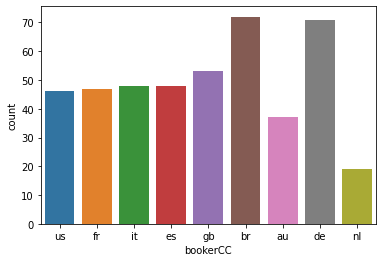

In [22]:
sns.countplot(train_data["bookerCC"])
plt.show()

Most number of people are booked from br and de

# channel

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


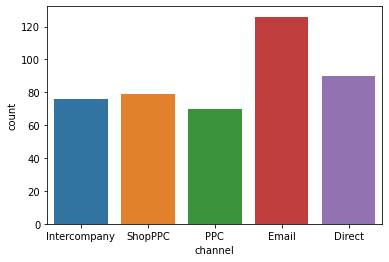

In [23]:
sns.countplot(train_data["channel"])
plt.show()

# international

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


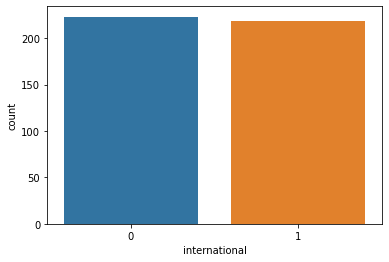

In [24]:
sns.countplot(train_data["international"])
plt.show()

# Months

In [25]:
train_data["Months"] = train_data["bookDate"].dt.month

In [26]:
train_data['Months'] = train_data['Months'].astype('object')

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


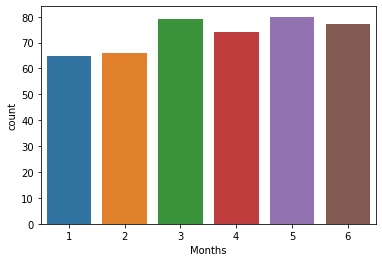

In [27]:
sns.countplot(train_data["Months"])
plt.show()

In [28]:
train_data

,userID,bookerCC,international,length_of_stay,channel,bookDate,commission,ltv,Months
0,1,us,0,1,Intercompany,2017-02-22,49.0,52.34,2
1,2,us,0,3,ShopPPC,2017-06-21,90.0,103.48,6
2,3,us,0,4,Intercompany,2017-03-10,136.0,155.86,3
3,5,us,1,3,PPC,2017-01-13,142.6,173.45,1
4,6,us,0,3,Email,2017-03-03,96.0,107.02,3
...,...,...,...,...,...,...,...,...,...
436,453,nl,1,3,Intercompany,2017-06-05,99.2,126.28,6
437,454,nl,0,2,Email,2017-03-29,104.0,108.19,3
438,455,nl,0,3,ShopPPC,2017-04-02,159.0,182.28,4
439,459,nl,0,3,Intercompany,2017-05-11,180.0,216.44,5


# HeatMap

In [29]:
heatmap = train_data[['ltv', 'commission', 'length_of_stay']]

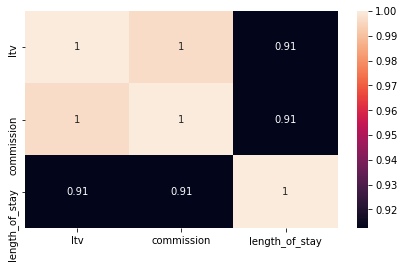

In [30]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with commission and length_of_stay

# Statistical Significance

H0:The null hypothesis of the test is the data is normally distributed

HA:The data is not normally distributed

In [31]:
stats.shapiro(train_data['ltv'])

ShapiroResult(statistic=0.7717365622520447, pvalue=2.6010453901148826e-24)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [32]:
columns_cat = list(cat_cols.columns)
columns_cat

['bookerCC', 'channel', 'international']

In [33]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (train_data[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['bookerCC', 'channel']
TTest: ['international']


H0, the distributions of both populations are equal 

The alternative hypothesis H1 is that the distributions are not equal.

In [34]:
yes=train_data[train_data['international']==1]['ltv']
no=train_data[train_data['international']==0]['ltv']

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ltv', ylabel='Density'>

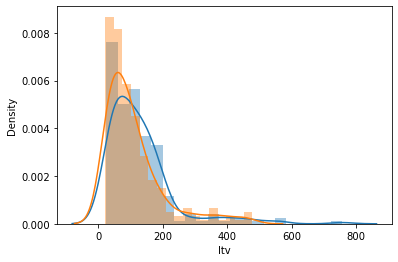

In [35]:
sns.distplot(yes)
sns.distplot(no)

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same

In [36]:
c = stats.mannwhitneyu(yes,no)
print(c)

MannwhitneyuResult(statistic=20494.0, pvalue=0.0021921048725842846)


p-value is smaller than 0.05 we reject null hypothesis i.e the mean rank will not be the same for both international and domastic.

we test above for international feature with non-Paramteric unpaired ttest and we concluded that this feature is significant to predict target

H0:the mean ranks of the groups are the same.

H1:the mean ranks of the groups are not the same.

In [37]:
br=train_data[train_data['bookerCC']=='br']['ltv']
de=train_data[train_data['bookerCC']=='de']['ltv']
gb=train_data[train_data['bookerCC']=='gb']['ltv']
it=train_data[train_data['bookerCC']=='it']['ltv']
es=train_data[train_data['bookerCC']=='es']['ltv']
fr=train_data[train_data['bookerCC']=='fr']['ltv']
us=train_data[train_data['bookerCC']=='us']['ltv']
au=train_data[train_data['bookerCC']=='au']['ltv']
nl=train_data[train_data['bookerCC']=='nl']['ltv']

In [38]:
a = stats.kruskal(br,de,gb,it,es,fr,us,au,nl)
print(a)

KruskalResult(statistic=44.8655731848628, pvalue=3.902281433644974e-07)


p-value < 0.05 reject H0, bookerCC is significant in predicting LTV

In [39]:
stats.f_oneway(br,de,gb,it,es,fr,us,au,nl)

F_onewayResult(statistic=3.1606115889160145, pvalue=0.0017188991058437629)

In [40]:
Email=train_data[train_data['channel']=='Email']['ltv']
Direct=train_data[train_data['channel']=='Direct']['ltv']
ShopPPC=train_data[train_data['channel']=='ShopPPC']['ltv']
Intercompany=train_data[train_data['channel']=='Intercompany']['ltv']
PPC=train_data[train_data['channel']=='PPC']['ltv']

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

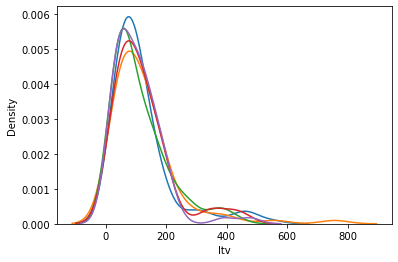

In [41]:
sns.distplot(Email,hist=False,label='Email')
sns.distplot(Direct,hist=False,label='Direct')
sns.distplot(ShopPPC,hist=False,label='ShopPPC')
sns.distplot(Intercompany,hist=False,label='Intercompany')
sns.distplot(PPC,hist=False,label='PPC')
plt.show()

In [42]:
b =stats.kruskal(Email,Direct,ShopPPC, Intercompany, PPC)
print(b)

KruskalResult(statistic=1.7439936835040744, pvalue=0.7827114645843862)


p-value > 0.05 fail to reject H0, channel is not significant to predict LTV

In [43]:
stats.f_oneway(Email,Direct,ShopPPC, Intercompany, PPC)

F_onewayResult(statistic=0.4949577132226689, pvalue=0.7394609679490083)

In [44]:
p_values = [a[1],b[1],c[1]]

In [45]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
bookerCC,3.902281e-07
channel,7.827115e-01
international,2.192105e-03


bookerCC and international play a significant role in predicting the LTV

In [46]:
numerical_cols.drop(['international'], axis=1)

,length_of_stay,commission,ltv
0,1,49.0,52.34
1,3,90.0,103.48
2,4,136.0,155.86
3,3,142.6,173.45
4,3,96.0,107.02
...,...,...,...
436,3,99.2,126.28
437,2,104.0,108.19
438,3,159.0,182.28
439,3,180.0,216.44


In [47]:
cat_cols.head()

,bookerCC,channel,international
0,us,Intercompany,0
1,us,ShopPPC,0
2,us,Intercompany,0
3,us,PPC,1
4,us,Email,0


In [48]:
import statsmodels.api as sm

# Data Preprocessing

In [49]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [50]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,international,length_of_stay,commission,ltv,international,bookerCC_br,bookerCC_de,bookerCC_es,bookerCC_fr,bookerCC_gb,bookerCC_it,bookerCC_nl,bookerCC_us,channel_Email,channel_Intercompany,channel_PPC,channel_ShopPPC
0,0,1,49.0,52.34,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,3,90.0,103.48,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,4,136.0,155.86,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,3,142.6,173.45,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0,3,96.0,107.02,0,0,0,0,0,0,0,0,1,1,0,0,0


In [51]:
X=dfn.drop(['ltv'],axis=1)
y=dfn['ltv']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ltv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5980.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:28:47   Log-Likelihood:                -1469.6
No. Observations:                 441   AIC:                             2971.
Df Residuals:                     425   BIC:                             3037.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.0011      1.437     -7.654      0.000     -13.826      -8.176
international            3.1890      0.353      9.021      0.000       2.494       3.884
length_of_stay           0.7930      0.500      1.586      0.113      -0.190       1.776
commission               1.2693      0.013     97.218      0.000       1.244       1.295
international            3.1890      0.353      9.021      0.000       2.494       3.884
bookerCC_br              6.2255      1.491      4.177      0.000       3.296       9.155
bookerCC_de              1.4612      1.428      1.023      0.307      -1.345       4.267
bookerCC_es             -0.9794      1.519     -0.645      0.519      -3.965       2.006
bookerCC_fr              2.6216      1.544      1.698      0.090      -0.413       5.657
bookerCC_gb              3.6698      1.497      2.451      0.015       0.726       6.613
bookerCC_it              3.8142      1.530      2.493      0.013       0.807       6.821
bookerCC_nl              2.7133      1.964      1.381      0.168      -1.148       6.575
bookerCC_us              4.8112      1.535      3.135      0.002       1.795       7.827
channel_Email           -7.0472      0.959     -7.351      0.000      -8.931      -5.163
channel_Intercompany    -3.6186      1.083     -3.340      0.001      -5.748      -1.489
channel_PPC             -8.1249      1.113     -7.303      0.000     -10.312      -5.938
channel_ShopPPC         -7.8320      1.076     -7.278      0.000      -9.947      -5.717
==============================================================================
Omnibus:                      211.530   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4711.473
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                      18.718   Cond. No.                     3.56e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.45e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Assumptions:

No autocorrelation

Linearity of residuals

Normality of error terms

No Heteroscedacity

No strong MultiCollinearity


Assumption 1 No Auto correlation.

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation. If the value ranges from 2-4, it is known as Negative autocorrelation. If the value is exactly 2, it means No Autocorrelation. For a good linear model, it should have low or no autocorrelation. we can see here the values of dublin watson test: 2.064 (No AUTO-CORRELATION)

From the graph below, we can easily see that there is no autocorrelation.

<ipython-input-52-4466f1a047e8>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


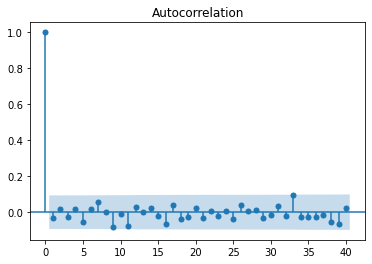

In [52]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

Assumption 2- Normality of Residuals

The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

H0: the error terms are normally distributed
dof for residuals is n-2

In [53]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=4711.473468942737, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected. In this case the computed value of the JB statistic 4711.47 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

C:\Users\pinarsungu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


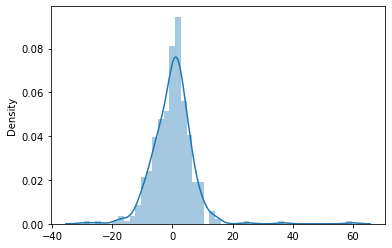

In [54]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed

Asssumption 3 - Linearity of residuals

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.

In [55]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(2.2584307208739167, 2.4249408498330877e-09)

H0:The data is linear, pvalue < 0.05 reject H0, so residuals are not normally distributed

Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test) Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are: 𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 The residuals should be homoscedastic.

Goldfeld Test

In [56]:
import statsmodels.stats.api as sms

name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(0.9817147657650074, 0.5528891540241939, 'increasing')

p-value > 0.05 indicates we fail to reject the null in favor of heteroscedasticity.

Assumption 5- NO MULTI COLLINEARITY

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

C:\Users\pinarsungu\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
international,inf
length_of_stay,8.931037
commission,9.186971
international,inf
bookerCC_br,2.808704
bookerCC_de,2.547862
bookerCC_es,2.070409
bookerCC_fr,2.100700
bookerCC_gb,2.194191
bookerCC_it,2.100434


we can see that there is high VIF in column international/domestic type. These veriables are not significant to predict target  we can remove them

In [58]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['ltv', 'international'],axis=1)
y=dfn['ltv']          
#y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 14)
(308,)
(133, 14)
(133,)


# Model Building

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.9947780712859265
R^2 score for test: 0.9927816563969425


In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [64]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 7.9337633976918145
MAE 5.2862474047901955
R-squared: 0.9927816563969425


In [65]:
#Feature Selection by Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['commission', 'bookerCC_br', 'bookerCC_de', 'bookerCC_fr', 'bookerCC_gb', 'bookerCC_it', 'bookerCC_nl', 'bookerCC_us', 'channel_Email', 'channel_Intercompany', 'channel_PPC', 'channel_ShopPPC']


In [66]:
X_new = X[selected_features]

In [67]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ltv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6293.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:28:48   Log-Likelihood:                -1508.9
No. Observations:                 441   AIC:                             3044.
Df Residuals:                     428   BIC:                             3097.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.5667      1.189     -7.205      0.000     -10.904      -6.230
commission               1.2887      0.005    266.502      0.000       1.279       1.298
bookerCC_br              5.9261      1.218      4.865      0.000       3.532       8.320
bookerCC_de              3.1498      1.212      2.598      0.010       0.767       5.533
bookerCC_fr              4.4636      1.373      3.251      0.001       1.765       7.162
bookerCC_gb              5.4712      1.322      4.139      0.000       2.873       8.069
bookerCC_it              4.4242      1.362      3.248      0.001       1.747       7.102
bookerCC_nl              5.0182      1.921      2.612      0.009       1.242       8.794
bookerCC_us              4.8158      1.386      3.474      0.001       2.091       7.541
channel_Email           -6.8203      1.043     -6.537      0.000      -8.871      -4.770
channel_Intercompany    -3.7215      1.179     -3.156      0.002      -6.039      -1.404
channel_PPC             -8.1515      1.211     -6.731      0.000     -10.532      -5.771
channel_ShopPPC         -8.2835      1.171     -7.075      0.000     -10.585      -5.982
==============================================================================
Omnibus:                      145.144   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2522.538
Skew:                           0.925   Prob(JB):                         0.00
Kurtosis:                      14.570   Cond. No.                         911.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ridge and Lasso Regression

In [68]:
from sklearn.linear_model import Ridge, Lasso

In [69]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

Ridge Regression
RMSE: 12.371936498697806
MAE 7.587068075468365
R-squared: 0.982446875779104


In [70]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Lasso Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

Lasso Regression
RMSE: 8.546386393016563
MAE 5.822882157530427
R-squared: 0.9916238564883516


# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
print('Decision Tree')
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

Decision Tree
RMSE: 29.52034400460767
MAE 8.585563909774438
R-squared: 0.9000640167060532


# RandomForest

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X_train,y_train)
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [75]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)
print('Random Forest')
y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

Random Forest
RMSE: 11.372703801320462
MAE 5.292397513956385
R-squared: 0.9851677677154911


In [76]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['Score']).sort_values("Score",ascending=False)

,Score
commission,0.986747
bookerCC_de,0.008301
channel_Email,0.001234
length_of_stay,0.001155
bookerCC_us,0.000778
bookerCC_gb,0.000416
channel_PPC,0.000329
bookerCC_it,0.000325
channel_ShopPPC,0.000179
bookerCC_es,0.000172


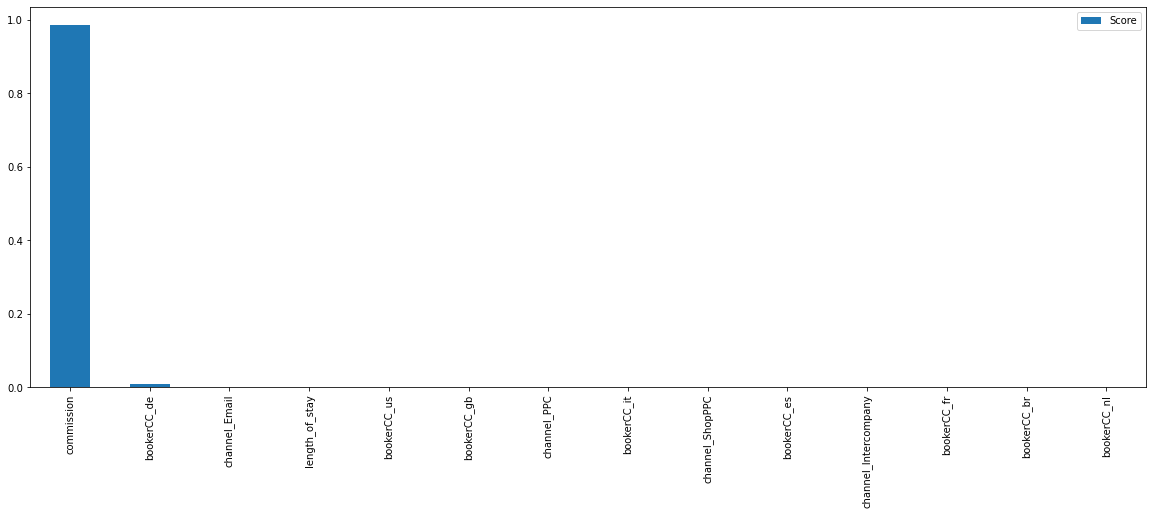

In [77]:
pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

commission and bookerCC_de are the most important features in predicting ltv

# Prediction 

In [78]:
test_data = pd.read_excel('Problem3Test.xlsx')

In [79]:
numerical_cols = test_data.select_dtypes(include=["int64","float64"])

In [80]:
numerical_cols.drop(["userID", "international"],axis=1,inplace=True)

C:\Users\pinarsungu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [81]:
cat_cols = test_data.select_dtypes(include="object")

In [82]:
no_col = test_data[["international"]]

In [83]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [84]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [85]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,length_of_stay,commission,ltv,international,bookerCC_es,bookerCC_fr,bookerCC_gb,bookerCC_it,bookerCC_nl,bookerCC_us,channel_Email,channel_Intercompany,channel_PPC,channel_ShopPPC
0,3,130.2,NaN,1,0,0,0,0,0,1,1,0,0,0
1,2,64.0,NaN,0,0,0,0,0,0,1,1,0,0,0
2,10,333.3,NaN,1,0,0,0,0,0,1,0,0,0,1
3,3,99.0,NaN,0,0,0,0,0,0,1,0,1,0,0
4,1,29.0,NaN,0,0,0,0,1,0,0,0,1,0,0


In [86]:
X_test=dfn.drop(['ltv', 'international'],axis=1)
y=dfn['ltv']

In [87]:
list(set(X_train).difference(X_test))

['bookerCC_br', 'bookerCC_de']

In [88]:
X_test['bookerCC_de'] = 0
X_test['bookerCC_br'] = 0

In [89]:
predictions = rf.predict(X_test)

In [90]:
test_data['ltv'] = predictions
test_data

,userID,bookerCC,international,length_of_stay,channel,bookDate,commission,ltv
0,20,us,1,3,Email,2017-02-27,130.2,160.928727
1,25,us,0,2,Email,2017-06-01,64.0,71.379555
2,4,us,1,10,ShopPPC,2017-02-09,333.3,444.725900
3,49,us,0,3,Intercompany,2017-05-13,99.0,121.176511
4,114,it,0,1,Intercompany,2017-03-10,29.0,31.853098
5,115,it,1,3,Intercompany,2017-02-22,114.7,136.949183
6,89,fr,0,3,ShopPPC,2017-02-07,84.0,102.747747
7,90,fr,0,3,Direct,2017-03-07,78.0,89.083275
8,91,fr,1,2,Direct,2017-04-25,86.1,100.701790
9,158,es,0,1,Direct,2017-06-08,37.0,40.765341
